In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df=df.drop(['agent','company'],axis=1)

In [ ]:
df=df.dropna(axis=0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df['is_canceled'].value_counts()

is_canceled
0    74745
1    44153
Name: count, dtype: int64

In [ ]:
df_num = df.select_dtypes(include = ['float64','int64'])

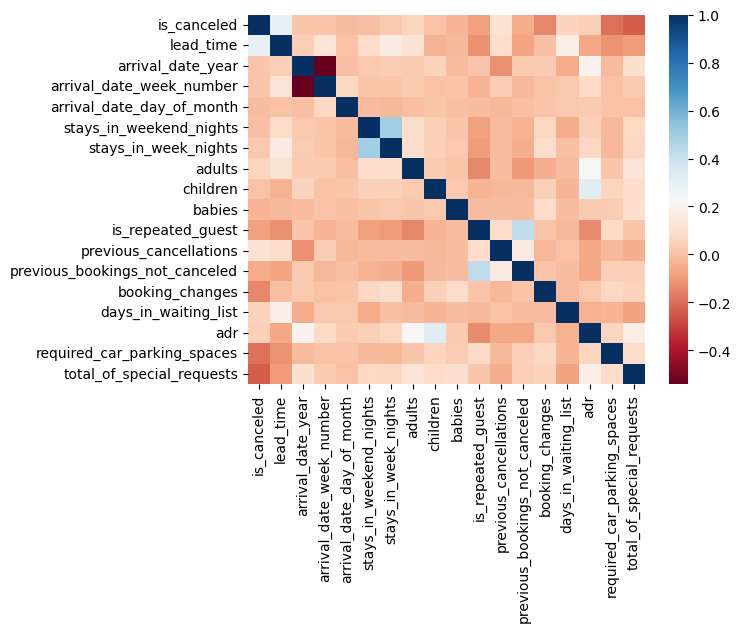

In [ ]:
sns.heatmap(df_num.corr(),cmap='RdBu');

<ipython-input-11-ae080ecfd5b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market_segment', data=df, palette = 'tab10')


Text(0.5, 1.0, 'Tipos de Segmento de Mercado')

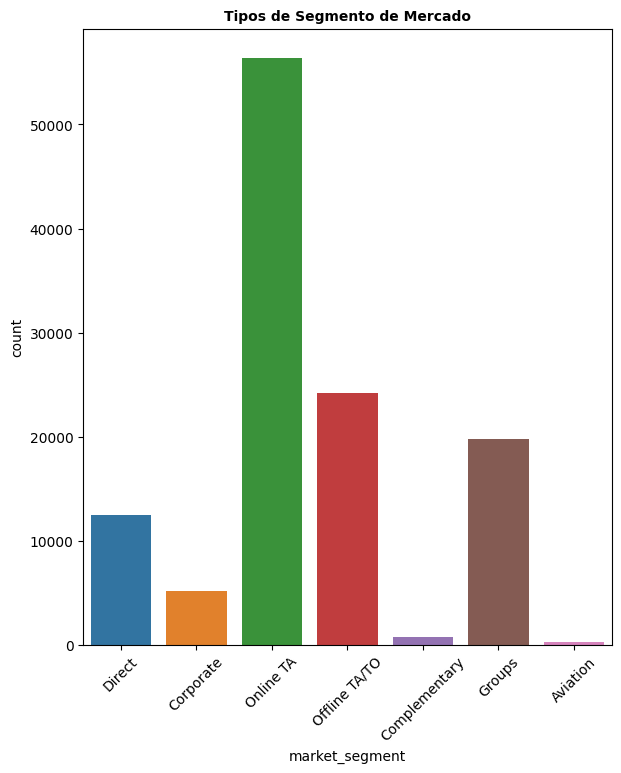

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df, palette = 'tab10')
plt.xticks(rotation = 45)
plt.title('Tipos de Segmento de Mercado',fontweight="bold", size=10)

In [ ]:
online_ta_data = df[df['market_segment'] == 'Online TA']

canceled_counts = online_ta_data['is_canceled'].value_counts()

print("Para 'online ta' seguimento:")
print("Cancelados:", canceled_counts.get(0, 0))
print("Nao cancelados:", canceled_counts.get(1, 0))

Para 'online ta' seguimento:
Cancelados: 35664
Nao cancelados: 20738


<ipython-input-13-efa7aa7cd08a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'distribution_channel',  palette='tab10')


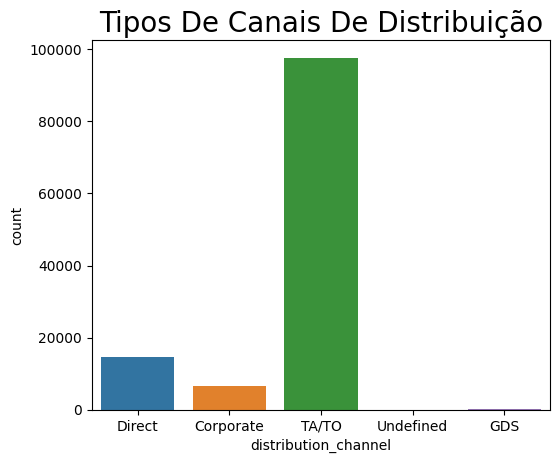

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'distribution_channel',  palette='tab10')
plt.title('Tipos De Canais De Distribuição', size=20)
plt.subplots_adjust(right=1.7)

In [ ]:
online_ta_data = df[df['distribution_channel'] == 'TA/TO']

canceled_counts = online_ta_data['is_canceled'].value_counts()

print("Para seguimento 'TA/TO':")
print("Cancelados:", canceled_counts.get(0, 0))
print("Nao cancelados:", canceled_counts.get(1, 0))

Para seguimento 'TA/TO':
Cancelados: 57611
Nao cancelados: 40119


<Figure size 1000x600 with 0 Axes>

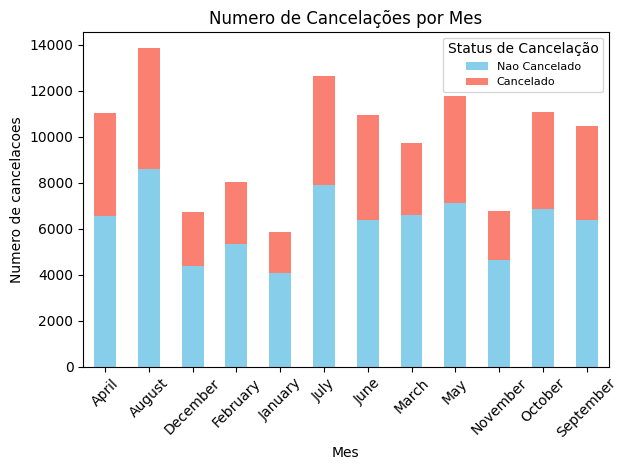

In [ ]:
counts_df = df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack(fill_value=0)

# Create bar plot using seaborn
plt.figure(figsize=(10, 6))
counts_df.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Mes')
plt.ylabel('Numero de cancelacoes')
plt.title('Numero de Cancelações por Mes')

plt.xticks(rotation=45)

plt.tight_layout()
plt.legend(title='Status de Cancelação', labels=['Nao Cancelado', 'Cancelado'], fontsize = 8)
plt.show()

<Figure size 1000x600 with 0 Axes>

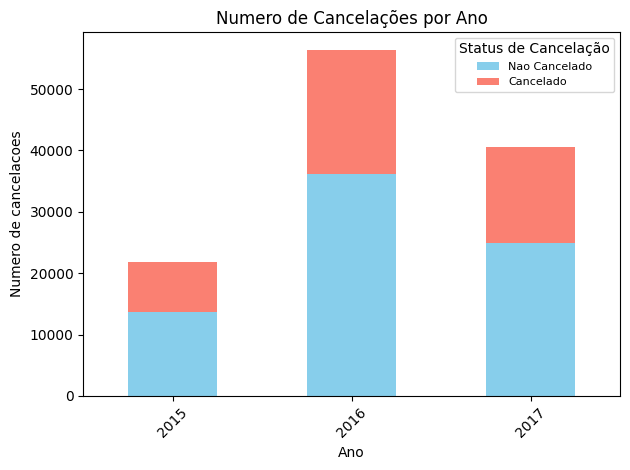

In [ ]:
counts_df = df.groupby('arrival_date_year')['is_canceled'].value_counts().unstack(fill_value=0)

# Create bar plot using seaborn
plt.figure(figsize=(10, 6))
counts_df.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Ano')
plt.ylabel('Numero de cancelacoes')
plt.title('Numero de Cancelações por Ano')

plt.xticks(rotation=45)

plt.tight_layout()
plt.legend(title='Status de Cancelação', labels=['Nao Cancelado', 'Cancelado'], fontsize = 8)
plt.show()

In [ ]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [ ]:
# Converter dados categóricos para a análise
X=pd.get_dummies(X,dtype=float,drop_first=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

In [ ]:
train_X , val_X , train_y , val_y = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_probabilities = dt_model.fit(train_X, train_y).predict(val_X)

print(average_precision_score(val_y, dt_probabilities))

1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_probabilities = knn_model.fit(X, y).predict(val_X)

print(average_precision_score(val_y, knn_probabilities))

0.8076477228601475


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 42).fit(X, y)
lr_probabilities = lr_model.predict(val_X)

print(average_precision_score(val_y, lr_probabilities))

0.9184487182513081


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# FOR THE DECISION TREE MODEL
print("DECISION TREE")
print("Confusion Matrix: \n", confusion_matrix(val_y, dt_probabilities))
print("-" * 20)
print("Accuracy Score: ", accuracy_score(val_y, dt_probabilities))
print("-" * 20)
print("Precision Score: ", precision_score(val_y, dt_probabilities))
print("-" * 20)
print("Recall Score: ", recall_score(val_y, dt_probabilities))

DECISION TREE
Confusion Matrix: 
 [[14851     0]
 [    0  8929]]
--------------------
Accuracy Score:  1.0
--------------------
Precision Score:  1.0
--------------------
Recall Score:  1.0


In [ ]:
# FOR THE KNN MODEL
print("KNN")
print("Confusion Matrix: \n", confusion_matrix(val_y, knn_probabilities))
print("-" * 20)
print("Accuracy Score: ", accuracy_score(val_y, knn_probabilities))
print("-" * 20)
print("Precision Score: ", precision_score(val_y, knn_probabilities))
print("-" * 20)
print("Recall Score: ", recall_score(val_y, knn_probabilities))

KNN
Confusion Matrix: 
 [[13910   941]
 [ 1411  7518]]
--------------------
Accuracy Score:  0.9010933557611438
--------------------
Precision Score:  0.8887575363518146
--------------------
Recall Score:  0.8419755851719117


In [ ]:
# FOR THE LOGISTIC REGRESSION MODEL
print("LOGISTIC REGRESSION")
print("Confusion Matrix: \n", confusion_matrix(val_y, lr_probabilities))
print("-" * 20)
print("Accuracy Score: ", accuracy_score(val_y, lr_probabilities))
print("-" * 20)
print("Precision Score: ", precision_score(val_y, lr_probabilities))
print("-" * 20)
print("Recall Score: ", recall_score(val_y, lr_probabilities))

LOGISTIC REGRESSION
Confusion Matrix: 
 [[14552   299]
 [  704  8225]]
--------------------
Accuracy Score:  0.9578216989066443
--------------------
Precision Score:  0.9649225715626466
--------------------
Recall Score:  0.9211557845223429


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel/hotel_bookings.csv')

In [ ]:
df=df.drop(['agent','company'],axis=1)
df=df.dropna(axis=0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

In [ ]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [ ]:
# Converter dados categóricos para a análise
X=pd.get_dummies(X,dtype=float,drop_first=True)

In [ ]:
train_X , val_X , train_y , val_y = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_probabilities = knn_model.fit(X, y).predict(val_X)

print(average_precision_score(val_y, knn_probabilities))

0.8505329210976679


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression(random_state = 42)
grid_search = GridSearchCV(estimator=lr_model, param_grid={}, cv=5)
grid_search.fit(train_X, train_y);
lr_probabilities = grid_search.predict(val_X);

print(average_precision_score(val_y, lr_probabilities))

0.9204041216566338


In [ ]:
pip install nbconvert

In [ ]:
jupyter nbconvert --to html Hotel.ipynb
